# Machine Learning: Use cases in FINTECH

- The data for these projects are manufactured fields based on trends found in real-world case studies. The fields describe what companies usually track from their users, and the distributions are based on observed distributions in the real-world analysis. This means that, although the data has been artificially created, the patterns, associations, and distributions are not random.


- The data serves as a good representation of what you may encounter in the workplace. That is, the data is rarely clean, and a lot of pre-processing is needed to get it ready for modeling.
***

## Note on models Building:
The Model Building Process is composed of multiple parts:
- **Plotting with Matplotlib and Seaborn** - A lot of time will be spent on Exploratory Data Analysis (EDA)
- **Data Manipulation** - We will use Pandas and Numpy for all of our data formatting steps.
- **Classification Models** from Sklearn Library (Logistic Regression, Tree, SVM, ...)
- **K-Fold Cross Validation, Grid Search** (Parameter Tuning), and **Feature Selection** algorithms.
***

## 1. Introduction

In today's market, many companies have a mobile presence. Often, these companies provide free products/services in their mobile apps in an attempt to transition their customers to a paid membership. For this, you need a Budget. Since marketing efforts are never free, these companies need to know exactly who to target with offers and promotions.

- **Market:** The target audience is customers who use a company's free product. In this case study, this refers to users who installed (and used) the company's free mobile app.

- **Product:** The paid memberships often provide enhanced versions of the free products already given for free, alongside new features.

- **Goal:** The objective of this model is to predict which users will not subscribe to the paid membership so that greater marketing efforts can go into trying to "convert" them to paid users.
***

## 2. Business Challenge
- In this Case Study, we will be working for a fin-tech company that wants to provide its customers with a paid mobile app subscription that will allow them to track all of their finances in one place. To attract customers, the company releases a free version of its app with some of the main features unlocked.


- The company has tasked you to identify which users will most likely NOT enroll in the paid product so that additional offers can be given to them. Because of the costs of these offers, the company does not want to offer them to everybody, especially customers who were going to enroll anyways.
****

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
data = pd.read_csv("data/appdata10.csv")
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [3]:
data.describe(include='all')

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
count,50000.000000,50000,50000.000000,50000,50000.00000,50000,50000.000000,50000.000000,50000.000000,50000.000000,31074,50000.000000
unique,NaN,49747,NaN,24,NaN,38799,NaN,NaN,NaN,NaN,31001,NaN
top,NaN,2012-11-25 15:00:00.365,NaN,15:00:00,NaN,Home,NaN,NaN,NaN,NaN,2013-05-05 03:08:27.972,NaN
freq,NaN,7,NaN,2989,NaN,266,NaN,NaN,NaN,NaN,2,NaN
mean,186889.729900,NaN,3.029860,NaN,31.72436,NaN,21.095900,0.107820,0.172020,0.621480,NaN,0.165000
std,107768.520361,NaN,2.031997,NaN,10.80331,NaN,15.728812,0.310156,0.377402,0.485023,NaN,0.371184
min,13.000000,NaN,0.000000,NaN,16.00000,NaN,1.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,93526.750000,NaN,1.000000,NaN,24.00000,NaN,10.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,187193.500000,NaN,3.000000,NaN,29.00000,NaN,18.000000,0.000000,0.000000,1.000000,NaN,0.000000
75%,279984.250000,NaN,5.000000,NaN,37.00000,NaN,28.000000,0.000000,0.000000,1.000000,NaN,0.000000


In [4]:
data.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

## 3. Data Description
- By working for the company, we have access to each customer's app behavior data. This data allows us to see the date and time of app installation, as well as the features the user engaged with within the app. App behavior is characterized as the list of app screens the user looked at, and whether the user played the financial mini-games available.


- The app usage data is only from the user's first day in the app. This limitation exists because users can enjoy a 24-hour free trial of the premium features, and the company wants to target them with new offers shortly after the trail is over.

| Feature | Description | 
|:-|:-|
| **user** | The client ID number | 
| **first_open** | The date and time, the user first open the app |
| **dayofweek** | The day in numerical form (0: Sunday,..., 6: Saturday) |
| **hour** | The hour of first open in 24h format |
| **age** | The age of the user |
| **screen_lists** | Describes every single screen name the user has set in this 24-hours |
| **numscreens** | The number of screens apairs in screen_lists |
| **minigame** | The app has a mini-game, if the user played in the 24h it is set to 1, otherwise, it is set to 0 |
| **liked** | If the user liked any feature of the app it is set to 1, otherwise, it is set to 0 |
| **used_premium_features** | The user usage of the free trial of premium features is set to 1, otherwise, it is set to 0 |
| **enrolled** | This is the target column. If the user has enrolled in the premium offer it is set to 1, otherwise, it is set to 0 |
| **enrolled_date** | The date of enrollement if they did |

## 4. Exploratory Data Analysis (EDA)

In [5]:
data.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

All features don't have missing values except `enrolled_date` because not all user enroll in the premium app. So we have 18926 enrolled user.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null object
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [7]:
data.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

We notice that `first_open`, `hour`,  and `enrolled_date` are `datetime` objects but in our dataset they are `object` type. So we need to convert them.

In [8]:
data["first_open"] = pd.to_datetime(data["first_open"], yearfirst=True)
data["enrolled_date"] = pd.to_datetime(data["enrolled_date"], yearfirst=True)
data["hour"] = data.hour.str.slice(1, 3).astype(int)

In [9]:
data.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

### Visualisation of the Features distributions

- A **distribution** is a function that shows the possible values for a variable and the probability of their occurrence. Best way to visualize our data is through `histograms`, 
- A **histogram** is a type of bar chart that represents numerical data. It is divided into intervals (or bins) that are not overlapping and span from the first observation to the last. The intervals (bins) are adjacent - where one stops, the other starts.

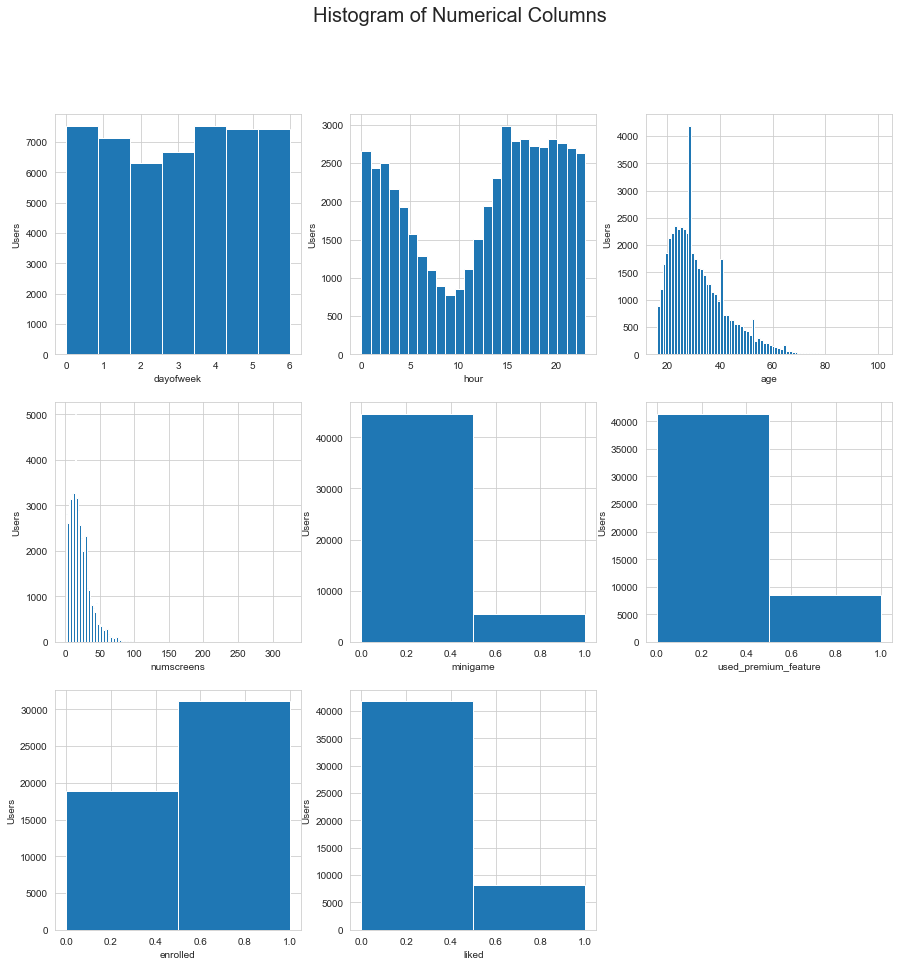

In [10]:
del_col = ['user', 'screen_list', 'enrolled_date', 'first_open']
columns = data.drop(del_col, axis=1).columns

plt.figure(figsize=(15, 15))
plt.suptitle("Histogram of Numerical Columns", fontsize=20)

for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    val = len(data[col].unique())
    data[col].hist(bins=val)
    plt.xlabel(f'{col}')
    plt.ylabel("Users")

### Correlation analysis

**Correlation:** Correlation is a measure of the joint variability of two variables. correlation could be thought of as a standardized measure. It takes on values between -1 and 1, thus it is easy for us to interpret the result.
   - A correlation of 1, known as perfect positive correlation, means that one variable is perfectly explained by the other.
   - A correlation of 0 means that the variables are independent.
   - A correlation of -1, known as perfect negative correlation, means that one variable is explaining the other one perfectly, but they move in opposite directions.

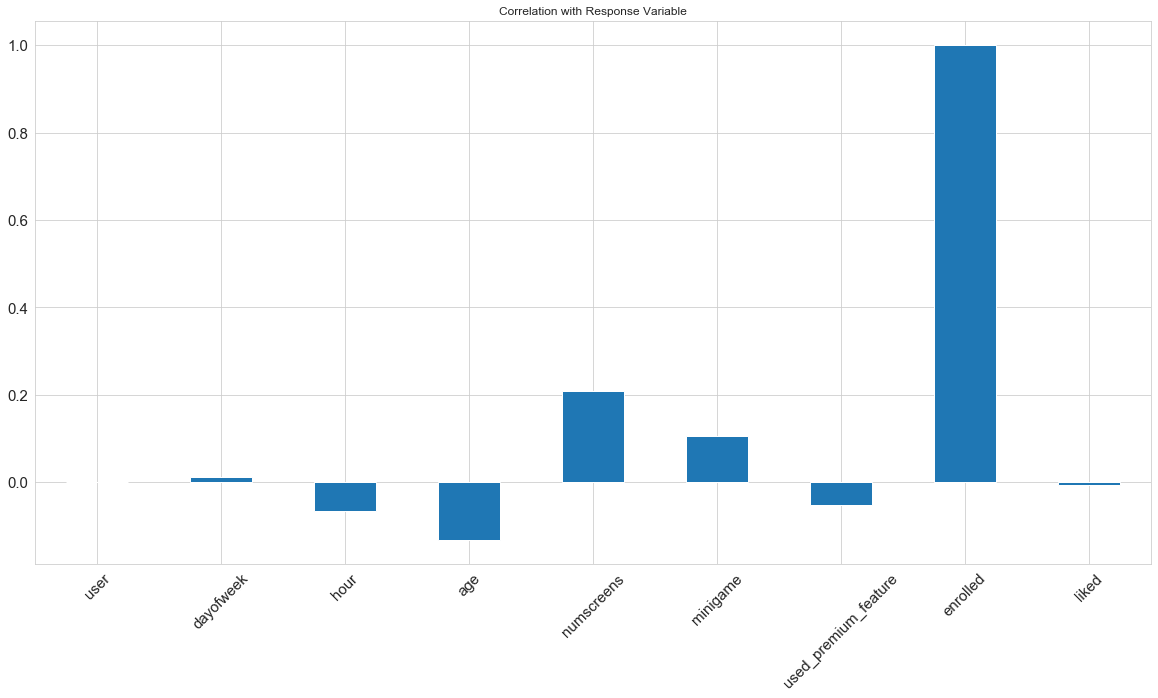

In [11]:
data.corrwith(data.enrolled).plot.bar(figsize=(20, 10), 
                                      title='Correlation with Response Variable',
                                      fontsize=15, rot=45, grid=True)

- `hour`, `age`, `used_premium_feature`, and `liked` are negatively correlated with `enrolled`, that's means that the more those parameter increase, the less likely that the user register for premium offer.

- `numscreens` and `minigame` are positively correlated with `enrolled`, that's means that the more those parameter increase, the more likely that the user register for premium offer.

- The most interesting remark from the graph is that  `used_premium_feature` is negatively correlated with `enrolled`. Users who used the premium feature are convinced that the product doesn't worth the price.

In [12]:
pd.set_option('display.float_format', '{:.2}'.format)
data.corr()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
user,1.0,-0.0026,-0.012,-0.0035,5.8e-05,0.0066,0.0041,-0.00052,0.0075
dayofweek,-0.0026,1.0,0.013,-0.012,0.0079,-0.0086,0.0014,0.011,-0.0057
hour,-0.012,0.013,1.0,0.019,-0.077,-0.0091,0.023,-0.067,-0.0017
age,-0.0035,-0.012,0.019,1.0,-0.13,0.02,0.0043,-0.13,-0.0026
numscreens,5.8e-05,0.0079,-0.077,-0.13,1.0,0.041,0.062,0.21,-0.0073
minigame,0.0066,-0.0086,-0.0091,0.02,0.041,1.0,0.11,0.1,-0.012
used_premium_feature,0.0041,0.0014,0.023,0.0043,0.062,0.11,1.0,-0.053,0.0017
enrolled,-0.00052,0.011,-0.067,-0.13,0.21,0.1,-0.053,1.0,-0.007
liked,0.0075,-0.0057,-0.0017,-0.0026,-0.0073,-0.012,0.0017,-0.007,1.0


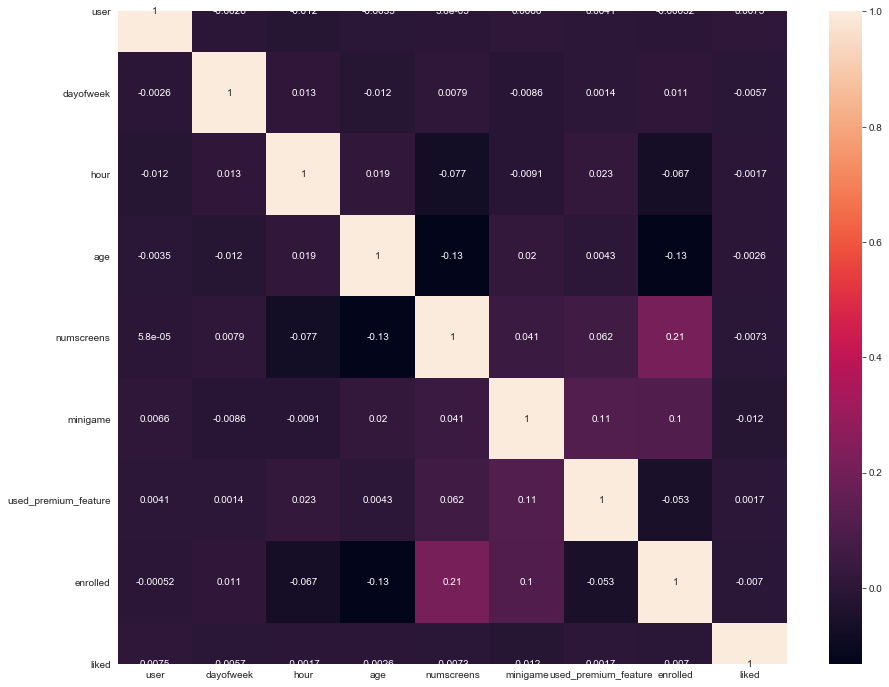

In [13]:
plt.figure(figsize=(15, 12))
sns.heatmap(data.corr(), annot=True)

## 5. Feature Engineering

We need to set a time limit to the user to register for the primium offer. To do so, we need to know the average time for a user to register.

We need to mesure the difference between `first_open` and `enrolled_date`, save it in  new column `difference`.

In [14]:
data['difference'] = (data.enrolled_date - data.first_open).astype('timedelta64[h]')
data.sample(10)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference
13061,150309,2013-05-03 13:08:33.359,4,13,24,"idscreen,Cycle,product_review,Home,Loan2,Insti...",30,0,0,1,2013-05-03 13:11:08.974,0,0.0
21922,2250,2013-03-30 20:33:41.669,5,20,25,"Cycle,Splash,Home,Loan2,WelcomeBankVerificatio...",31,0,0,1,2013-05-23 16:42:04.898,1,1.3e+03
12004,168365,2013-02-23 13:55:18.199,5,13,39,"Splash,Cycle,Home,Loan2,product_review,product...",32,1,0,0,NaT,0,nan
49626,133708,2013-03-22 08:33:57.673,4,8,20,"joinscreen,Cycle,product_review,product_review...",45,0,0,1,2013-05-15 01:53:18.490,0,1.3e+03
17743,275771,2013-06-06 11:21:19.486,3,11,40,"Home,Finances,Credit3,ReferralContainer",4,0,1,0,NaT,0,nan
3102,298733,2013-01-29 16:53:41.466,1,16,27,"Splash,Cycle,Loan2,CommunityAndInvites,Institu...",19,0,0,1,2013-02-02 18:23:19.815,0,9.7e+01
5024,74399,2013-02-06 07:19:18.917,2,7,30,"idscreen,joinscreen,Cycle,Credit3Container,loc...",34,0,0,1,2013-02-06 07:28:54.554,0,0.0
538,56705,2013-03-24 03:50:19.300,6,3,20,"joinscreen,Cycle,product_review,product_review...",28,0,0,1,2013-03-24 04:05:58.684,0,0.0
45981,6571,2013-03-16 18:53:45.125,5,18,23,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaT,0,nan
7596,363188,2013-03-20 19:22:41.650,2,19,44,"VerifyCountry,location,LoginForm",3,0,0,0,NaT,0,nan


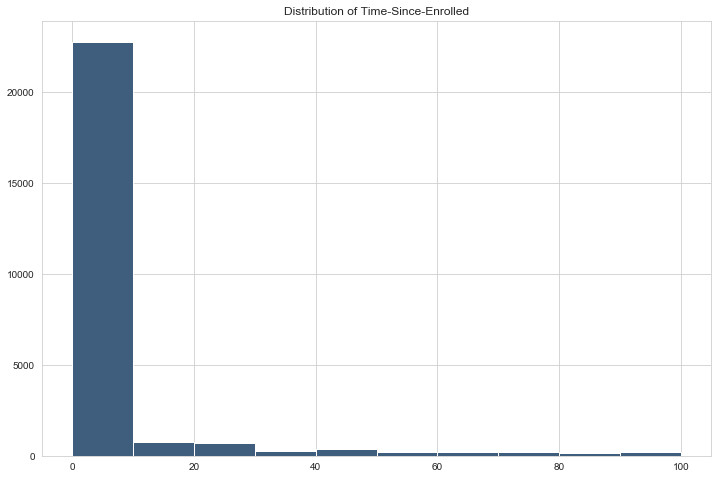

In [15]:
plt.figure(figsize=(12, 8))
plt.hist(data['difference'].dropna(), color='#3F5D7D', range=[0, 100])
plt.title('Distribution of Time-Since-Enrolled');

In [16]:
data.loc[data.difference > 48, 'enrolled'] = 0
data.drop(columns=['difference', 'enrolled_date', 'first_open'], axis=1, inplace=True)

Now, we are going to analyze the `screen_list` feature. Luckily we have a list of top screen used for this app.

In [17]:
from collections import Counter

list_of_screens = Counter()
for screens in data.screen_list.str.split(','):
    list_of_screens.update(screens)

print(f'We have {len(list_of_screens)} types of screens.')    
print(list_of_screens.most_common(20))

We have 137 types of screens.
[('product_review', 94218), ('Home', 38098), ('ScanPreview', 28351), ('VerifyPhone', 26230), ('location', 25888), ('Loan2', 25319), ('VerifyDateOfBirth', 23674), ('VerifySSN', 21546), ('VerifyCountry', 21158), ('VerifyToken', 20332), ('product_review3', 19613), ('SelectInstitution', 19595), ('Cycle', 17777), ('product_review2', 17127), ('idscreen', 17035), ('Credit3Container', 16489), ('BankVerification', 15901), ('Institutions', 14648), ('joinscreen', 13318), ('Splash', 10038)]


In [18]:
top_screens = pd.read_csv('data/top_screens.csv', index_col=None).top_screens.values
print(f'We have {len(top_screens)} important screens.')
top_screens

We have 58 important screens.


array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

We need to create a column for each of those top screens

In [19]:
data["screen_list"] = data.screen_list.astype(str) + ','

for sc in top_screens:
    data[sc] = data.screen_list.str.contains(sc).astype(int)
    data['screen_list'] = data.screen_list.str.replace(sc + ',', '')

To get value of the left screens, we'll create a new column `other` that saves the number of left screens.

In [20]:
data['other'] = data.screen_list.str.count(',')

In [21]:
data.drop('screen_list', axis=1, inplace=True)

In [22]:
data.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10


The `saving` columns are highly correlated, so we need to delete them. But before so we need to create a `SavingsCount` feature. The same for `Credit`, `CreditCards`, and `Loan`

In [23]:
savings_screens = ["Saving1", "Saving2", "Saving2Amount", "Saving4", "Saving5",
                   "Saving6", "Saving7", "Saving8", "Saving9", "Saving10"]

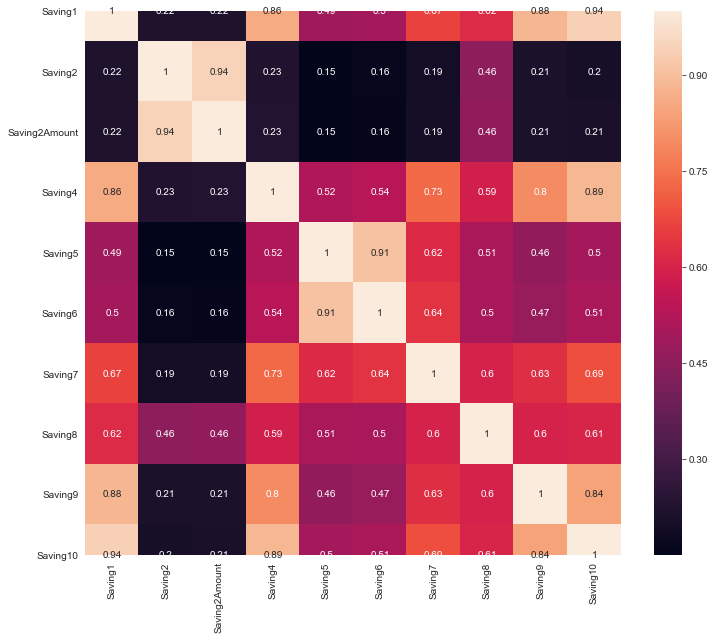

In [24]:
plt.figure(figsize=(12, 10))
sns.heatmap(data[savings_screens].corr(), annot=True)

In [25]:
data['SavingsCount'] = data[savings_screens].sum(axis=1)
data.drop(savings_screens, axis=1, inplace=True)

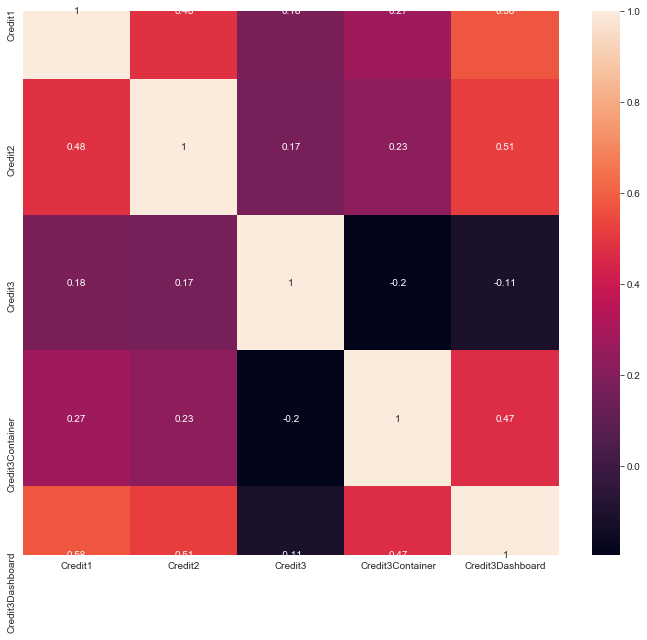

In [27]:
cm_screens = ["Credit1", "Credit2", "Credit3", "Credit3Container", "Credit3Dashboard"]
data["CMCount"] = data[cm_screens].sum(axis=1)

plt.figure(figsize=(12, 10))
sns.heatmap(data[cm_screens].corr(), annot=True)

In [28]:
data.drop(cm_screens, axis=1, inplace=True)

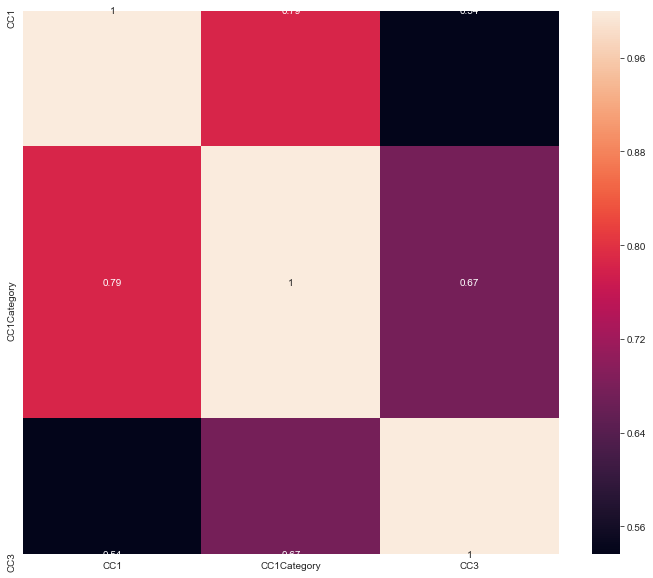

In [29]:
cc_screens = ["CC1", "CC1Category", "CC3"]
data['CCCount'] = data[cc_screens].sum(axis=1)

plt.figure(figsize=(12, 10))
sns.heatmap(data[cc_screens].corr(), annot=True)

In [30]:
data.drop(cc_screens, axis=1, inplace=True)

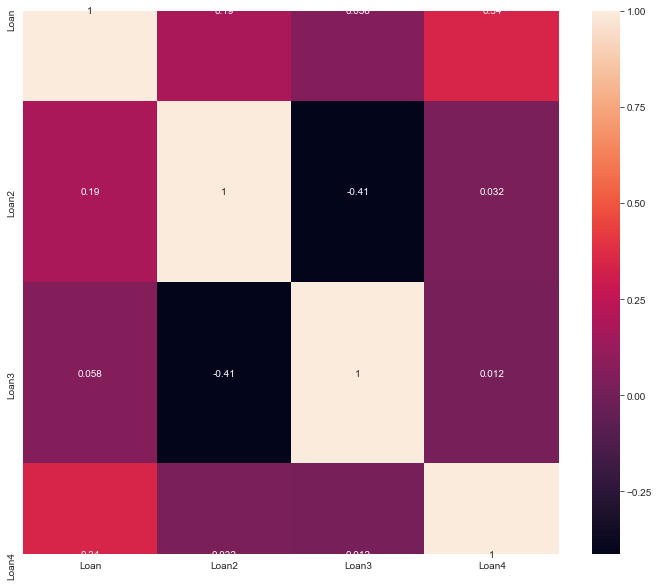

In [32]:
loan_screens = ["Loan", "Loan2", "Loan3", "Loan4"]
data["LoansCount"] = data[loan_screens].sum(axis=1)

plt.figure(figsize=(12, 10))
sns.heatmap(data[loan_screens].corr(), annot=True)

In [33]:
data.drop(loan_screens, axis=1, inplace=True)

In [34]:
data.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [40]:
data.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingsCount,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


## 6. Data Pre-Processing

In [41]:
response = data.enrolled
data = data.drop('enrolled', axis=1)

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, response, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 49)
(10000, 49)
(40000,)
(10000,)


In [61]:
train_identity = X_train['user']
X_train = X_train.drop(columns = ['user'])
test_identity = X_test['user']
X_test = X_test.drop(columns = ['user'])

print(X_train.shape)
print(X_test.shape)

(40000, 48)
(10000, 48)


In [59]:
X_train.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingsCount,CMCount,CCCount,LoansCount
20330,2,20,32,5,0,1,1,0,0,0,...,0,0,0,0,0,2,0,0,0,2
17532,1,21,22,42,1,0,0,1,1,1,...,0,0,0,0,0,13,0,1,0,1
45819,0,4,26,85,1,0,0,0,1,0,...,0,0,0,0,0,10,0,2,1,2
34807,4,13,25,24,1,0,0,1,0,0,...,0,0,0,0,0,10,0,0,0,1
31888,3,16,50,11,0,0,0,1,0,1,...,0,0,0,0,0,3,0,2,0,0


In [65]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_train_std = pd.DataFrame(sc_x.fit_transform(X_train))
X_train_std.columns = X_train.columns.values
X_train_std.index = X_train.index
X_train_std.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingsCount,CMCount,CCCount,LoansCount
20330,-0.504961,1.000837,0.025525,-1.026726,-0.346830,2.186018,2.246319,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,-0.289185,1.785389
17532,-0.997389,1.135280,-0.898034,1.328829,2.883254,-0.457453,-0.445173,0.962262,1.550753,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.839740,-0.260877,0.057524,-0.289185,0.309800
45819,-1.489818,-1.150250,-0.528611,4.066366,2.883254,-0.457453,-0.445173,-1.039218,1.550753,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,0.878421,1.336593,1.785389
34807,0.479896,0.059736,-0.620967,0.182883,2.883254,-0.457453,-0.445173,0.962262,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,-0.763372,-0.289185,0.309800
31888,-0.012532,0.463065,1.687932,-0.644744,-0.346830,-0.457453,-0.445173,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.875753,-0.260877,0.878421,-0.289185,-1.165789


In [66]:
X_test_std = pd.DataFrame(sc_x.fit_transform(X_test))
X_test_std.columns = X_test.columns.values
X_test_std.index = X_test.index
X_test_std.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingsCount,CMCount,CCCount,LoansCount
11841,-1.496239,-1.554724,0.866223,0.824043,-0.350843,-0.449198,2.262731,0.976477,-0.644537,0.959615,...,-0.121722,-0.111594,-0.119159,-0.089803,-0.088089,1.329613,-0.255034,-0.756633,-0.286358,-1.155734
19602,0.958624,-0.882463,-0.535024,0.571073,-0.350843,-0.449198,-0.441944,0.976477,-0.644537,0.959615,...,-0.121722,-0.111594,-0.119159,-0.089803,-0.088089,0.778912,-0.255034,-0.756633,-0.286358,0.322565
45519,-1.496239,0.327606,0.492557,-0.630533,-0.350843,2.226191,-0.441944,-1.024090,-0.644537,-1.042085,...,-0.121722,-0.111594,-0.119159,-0.089803,-0.088089,-0.322491,-0.255034,0.066599,-0.286358,1.800864
25747,0.958624,0.865414,-1.002106,-0.504049,-0.350843,-0.449198,2.262731,-1.024090,-0.644537,0.959615,...,-0.121722,-0.111594,-0.119159,-0.089803,-0.088089,0.503561,-0.255034,-0.756633,-0.286358,-1.155734
42642,0.958624,-1.554724,-0.161358,0.697558,-0.350843,-0.449198,-0.441944,-1.024090,-0.644537,0.959615,...,-0.121722,-0.111594,-0.119159,-0.089803,-0.088089,-0.597841,1.947331,-0.756633,3.027972,-1.155734


### Linear Regression

In [106]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(random_state=0, penalty='l1', solver='liblinear')
lr_classifier.fit(X_train_std, y_train)

y_train_pred = lr_classifier.predict(X_train_std)
y_test_pred = lr_classifier.predict(X_test_std)

In [107]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(f"Confusion Matrix en train:\n{confusion_matrix(y_train, y_train_pred)}")
print(f"Confusion Matrix en test:\n{confusion_matrix(y_test, y_test_pred)}")

Confusion Matrix en train:
[[15379  4699]
 [ 4596 15326]]
Confusion Matrix en test:
[[3877 1195]
 [1126 3802]]


In [108]:
print(f"Accuracy score en train: {accuracy_score(y_train, y_train_pred)}")
print(f"Accuracy score en test: {accuracy_score(y_test, y_test_pred)}")

Accuracy score en train: 0.767625
Accuracy score en test: 0.7679


In [109]:
print(f"Classification Report en train:\n {classification_report(y_train, y_train_pred)}")
print(f"Classification Report en test:\n {classification_report(y_test, y_test_pred)}")

Classification Report en train:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77     20078
           1       0.77      0.77      0.77     19922

    accuracy                           0.77     40000
   macro avg       0.77      0.77      0.77     40000
weighted avg       0.77      0.77      0.77     40000

Classification Report en test:
               precision    recall  f1-score   support

           0       0.77      0.76      0.77      5072
           1       0.76      0.77      0.77      4928

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



In [83]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=classifier, X=X_train_std, y=y_train, cv=10)
print(f"Logistic Regression: {scores.mean():.3f} (+/-) {scores.std():.3f}")

Logistic Regression: 0.767 (+/-) 0.005


### Decision Tree Classifier

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier()
# classifier.fit(X_train, y_train)

params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))}

grid_search_cv = GridSearchCV(classifier, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

y_train_pred = grid_search_cv.predict(X_train)
y_test_pred = grid_search_cv.predict(X_test)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 11242 tasks      |

In [91]:
print(f"Confusion Matrix en train:\n{confusion_matrix(y_train, y_train_pred)}")
print(f"Confusion Matrix en test:\n{confusion_matrix(y_test, y_test_pred)}")

Confusion Matrix en train:
[[16427  3651]
 [ 5224 14698]]
Confusion Matrix en test:
[[4167  905]
 [1324 3604]]


In [92]:
print(f"Accuracy score en train: {accuracy_score(y_train, y_train_pred)}")
print(f"Accuracy score en test: {accuracy_score(y_test, y_test_pred)}")

Accuracy score en train: 0.778125
Accuracy score en test: 0.7771


In [93]:
print(f"Classification Report en train:\n {classification_report(y_train, y_train_pred)}")
print(f"Classification Report en test:\n {classification_report(y_test, y_test_pred)}")

Classification Report en train:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79     20078
           1       0.80      0.74      0.77     19922

    accuracy                           0.78     40000
   macro avg       0.78      0.78      0.78     40000
weighted avg       0.78      0.78      0.78     40000

Classification Report en test:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79      5072
           1       0.80      0.73      0.76      4928

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



### Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100)
# classifier.fit(X_train, y_train)

param_grid = {'max_depth':[3, None], 'min_samples_split':[2, 3, 10], 
              'min_samples_leaf':[1, 3, 10], 'bootstrap':[True, False], 
              'criterion':["gini", "entropy"]}

rf_grid_search_cv = GridSearchCV(classifier, param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)
rf_grid_search_cv.fit(X_train, y_train)

y_train_pred = rf_grid_search_cv.predict(X_train)
y_test_pred = rf_grid_search_cv.predict(X_test)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  8.4min finished


In [104]:
rf_grid_search_cv.best_estimator_.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [101]:
print(f"Confusion Matrix en train:\n{confusion_matrix(y_train, y_train_pred)}")
print(f"Confusion Matrix en test:\n{confusion_matrix(y_test, y_test_pred)}")

Confusion Matrix en train:
[[18116  1962]
 [ 2591 17331]]
Confusion Matrix en test:
[[4135  937]
 [1204 3724]]


In [102]:
print(f"Accuracy score en train: {accuracy_score(y_train, y_train_pred)}")
print(f"Accuracy score en test: {accuracy_score(y_test, y_test_pred)}")

Accuracy score en train: 0.886175
Accuracy score en test: 0.7859


In [103]:
print(f"Classification Report en train:\n {classification_report(y_train, y_train_pred)}")
print(f"Classification Report en test:\n {classification_report(y_test, y_test_pred)}")

Classification Report en train:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89     20078
           1       0.90      0.87      0.88     19922

    accuracy                           0.89     40000
   macro avg       0.89      0.89      0.89     40000
weighted avg       0.89      0.89      0.89     40000

Classification Report en test:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79      5072
           1       0.80      0.76      0.78      4928

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



In [110]:
pd.concat([pd.DataFrame(data.drop(columns = 'user').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(lr_classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,dayofweek,0.032574
1,hour,-0.003600
2,age,-0.149688
3,numscreens,-0.130597
4,minigame,-0.026462
5,used_premium_feature,-0.065907
6,liked,0.010695
7,location,-0.028331
8,Institutions,-0.062195
9,VerifyPhone,0.650341


In [ ]:
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)

****
## 7. Conclusion

- Our efforts have given us a model that will label every new user as "highly likely" (or "unlikely") to subscribe. We can further validate our results by running our predictions on daily new installs, and see whether our accuracy is consistent. From there, we can narrow our marketing efforts only to those users "unlikely" to subscribe, and thus increase our subscription rate.
- The increase in overall subscriptions can measure the benefits of this model to the company. Recall that those already likely to subscribe will do so, and although we can still give them offers, we don't have to go all out. On the other hand, users who are likely to leave may convert to paid subscribers if we give them an offer they cannot refuse. For example, these offers can come in the form of "1st month free", or "50% off yearly subscriptions". The latter shows that great offers can still be structured in a way that brings overall benefits to the company because we are locking the user in for an extended period.